<a href="https://colab.research.google.com/github/advaitkrishna-official/CardTamperingUsingComputerVision-/blob/main/CardTampering(ComputerVisionProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Card Tampering Detection Using Computer Vision:**

This Project is to detect tampering of PAN card using Computer Vision. This project will help different organisation in detecting whether the ID provided to them is by Employee/Coustomer is original or not.


For this project we will calculate the structural similarity of original PAN card and the PAN card uploaded by the user.

In [ ]:
#importing the neccesary packages
from skimage.metrics import structural_similarity #SKimage is a collection of algorithms for image processing and computer vision. Structural similarity : Compute the mean structural similarity(score) index between two images
import imutils
import cv2 # for all image processing requirements

from PIL import Image #is a library for opening, manipulating, and saving many different image file formats.
import requests #use to fetech the data from the URL


In [ ]:
#Making a directory
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [ ]:
#Open image and display
original = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/3/31/A_sample_of_Permanent_Account_Number_%28PAN%29_Card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://editor.analyticsvidhya.com/uploads/83117tampered.png', stream = True ).raw)

#https://editor.analyticsvidhya.com/uploads/83117tampered.png

Loading original and user provided images

In [ ]:
#The image Format of the source file
print("Original image format : ", original.format)
print("Tampered image format : ", tampered.format)

#Image size. in pixels The size is given as a 2-tuple(width, height).
print("Original image size", original.size)
print("Tampered image size", tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size (509, 314)
Tampered image size (250, 160)


In [ ]:
#Resizeing Image into a standard Format
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #Saving the original Image after Resizing

tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png") #Saving the tampered Image after Resizing


(250, 160)
(250, 160)


Converting the size of tampered and original Image

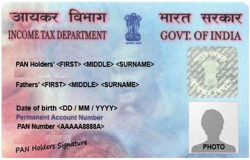

In [ ]:
# Display Original Image
original

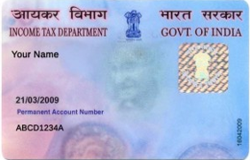

In [ ]:
#Display tampered Image
tampered

Comparing Pan Card Using CV2 Function: Reading the Image

In [ ]:
#loading the two input image
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

Reading image using OpenCV


In [ ]:
#Converting the Image from RGB to GrayScale: So its Easy for the machine to understand the Image(Like edges of the Image) is easier in Grayscale than RGB
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
#Compute the Structural Similarity Index (SSIM) between two Images, ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
#score: The returned similarity score is a value between -1 and 1, where 1 means the images are identical
#diff: This difference image is typically in a floating-point format between 0 (no difference) and 1 (maximum difference)

diff = (diff*255).astype("uint8")
#By multiplying by 255, you scale the values from the range [0, 1] up to [0, 255]

#printing the Similarity score
print("SSIM: {}".format(score))

SSIM: 0.3179105160586292


Here we are using the threshold function of CV which applies an adaptive threshold to the image which is stored in the form of array. This function transforms the grayscale image into a binary image using a mathematical formula

Find contours works on binary image and retrive the contours. This contours are useful tool for shape analysis and recogonition. Grab contours grabs the appropriate value of the contours.  

In [ ]:
#Calculating threshold and Contours
thresh = cv2.threshold(diff, 0 , 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#contours - cnts - outline of an image
#thresholding - thresh - is a technique used to separate objects from the background. It works by turning a grayscale (or sometimes color) image into a binary image

For every detected difference between the two images, this code finds the rectangular region that bounds that difference and draws a red box around it in both the original and the tampered images. This makes it easy to visually identify where changes occur.

In [ ]:
#loop over the contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c) #For each contour, cv2.boundingRect(c) calculates the smallest rectangle that completely contains the contour.
  #where x, y is the cordinate of the top-left point on the rectangle, w -width and h- height

  cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
  #cv2.rectangle- This draws a red rectangle on the original image around the detected region.
  #(x,y) - top left cordinate
  #(x+w, y+h) - bottom right cordinate
  #(0,0,255) - is the color in BGR format (blue=0, green=0, red=255 means pure red)
  #2 - thickness of the rectangle's outline in pixles

  cv2.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2 )

Original format Image


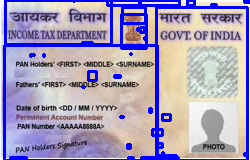

In [ ]:
#Display the original Image with contour
print('Original format Image')
Image.fromarray(original)

Tampered image


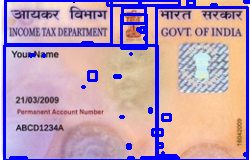

In [ ]:
#Display the Tampered Image with contour
print("Tampered image")
Image.fromarray(tampered)

After Viewing the contours, We can say that it didnot help us in deciding whether the images are similar or not.

Difference Image


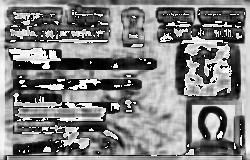

In [ ]:
#Now let us display the difference image with black

print("Difference Image")
Image.fromarray(diff)

The black Portions here only display the differences. Hence we can say that there is a difference between the Orignal image and tampered image, which is represented by the black areas in 'diff' image

Threshold Image


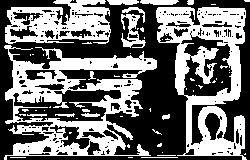

In [ ]:
#Display the threshold Image with white
print("Threshold Image")
Image.fromarray(thresh)

Here the white portions shows us the difference between the Original Image and Tamepered Image.

# Summary

Here we can say the following Conclutions:

1. SSIM index is 31.2% which says that there is difference between the Original image and the Image provided. By which we can conclude that the image provided by the user is tampered.

2. While Contours did not give us any possible difference in between original and tampered images, Threshold and Differnce Images pointed out to great extend the differnces between the Images. This was helpful to compare the Images and make a decision on whether the image is tampered or not.      